### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def entropy_calculation(values):
    entropy_set = []
    for value in values:
        value1 = value
        value2 = 1 - value1
        entropy = (-value1*np.log2(value1)-value2 * np.log2(value2)).round(3)
        entropy_set.append(entropy)
    return entropy_set
        

In [11]:
# Creating a list from 0.0 to 1.0 with an interval of 0.2
interval_list = [round(x, 1) for x in [i * 0.2 for i in range(6)]]
interval_list 

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [12]:
entropy = entropy_calculation(interval_list)

/var/folders/y2/33vgfdz176b018l37jlk7z3m0000gn/T/ipykernel_99975/2172854915.py:6: RuntimeWarning: divide by zero encountered in log2
  entropy = (-value1*np.log2(value1)-value2 * np.log2(value2)).round(3)
/var/folders/y2/33vgfdz176b018l37jlk7z3m0000gn/T/ipykernel_99975/2172854915.py:6: RuntimeWarning: invalid value encountered in double_scalars
  entropy = (-value1*np.log2(value1)-value2 * np.log2(value2)).round(3)


In [13]:
print(entropy)

[nan, 0.722, 0.971, 0.971, 0.722, nan]


In [14]:
def plot_fig(x, y):
    plt.plot(x, y, c = 'b', label = 'h(P) plot')
    plt.xlabel('entropy')
    plt.ylabel('values')
    plt.show()
    

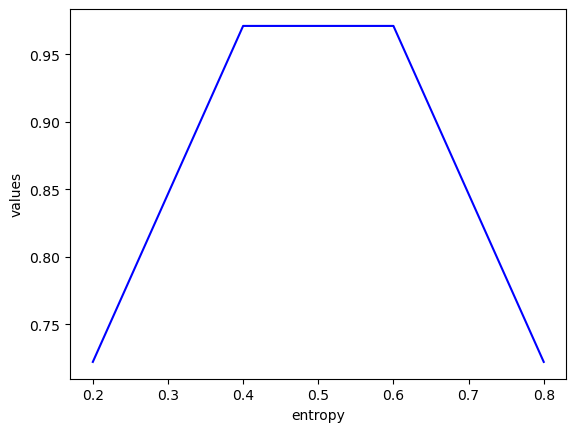

In [15]:
plot_fig(interval_list,entropy)

### create dataset

In [16]:
x_train = np.array([[1,1,1],
                    [0,0,1],
                    [0, 1, 0],
                    [1, 0, 1],
                    [1, 1, 1],
                    [1, 1, 0],
                    [0, 0, 0],
                    [1, 1, 0],
                    [0, 1, 0],
                    [0, 1, 0]])
                    
y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [17]:
x_train[0]

array([1, 1, 1])

In [18]:
def entropy(p):
    if p == 0 or p==1:
        return 0
    else:
        return -p * np.log2(p) - (1-p)* np.log2(1-p)
print(entropy(0.5))

1.0


In [21]:
def split_indices (X, index_feature):
    '''given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have that 
    feature = 1 and the right node those that have the feature = 0
        index_feature = 0 ==> ear shape
        index_feature = 1 ==> face shape
        index_feature = 2 ==> whiskers
        '''
    left_indices = []
    right_indices = []
    for i, x in enumerate(X):
        if x[index_feature] ==1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

In [22]:
split_indices(x_train,0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [45]:
def weighted_entropy(x, y , left_indices , right_indices):
    '''
    this function takes the splited dataset, the indices we choose to split and returns the weighted entropy'''
    #so now we have 
    w_right = len(right_indices)/len(x) #all of them are pointy 
    w_left = len(left_indices)/ len(x) #all of them are oval
    p_left = sum(y[left_indices])/len(left_indices) #as they are labeled as 1 and 0, the sum only took the value that are labeled as 1 as well as only take the input that are cats
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [42]:
left_indices, right_indices = split_indices(x_train,  0)

In [43]:
print(f"left_indices (Pointy) : {left_indices}")
print(f"right_indices (Oval) : {right_indices}")

left_indices (Pointy) : [0, 3, 4, 5, 7]
right_indices (Oval) : [1, 2, 6, 8, 9]


In [46]:
#taken a specific feature
weighted_entropy(x_train, y_train, left_indices, right_indices)

0.7219280948873623

In [51]:
print(y_train[left_indices])

print(sum(y_train[left_indices]))

print(sum(y_train[left_indices])/len(left_indices))

[1 0 1 1 1]
4
0.8


In [58]:
def information_gain(x, y, left_indices, right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node) #the full set of x 
    w_entropy = weighted_entropy(x,y,left_indices,right_indices) #entropy of a specific node
    information_gain = h_node - w_entropy
    return information_gain
    

In [59]:
information_gain(x_train, y_train,left_indices,right_indices)

0.2780719051126377

In [60]:
for i, feature_name in enumerate(['Ear Shape' ,'Face Shape' , 'Whiskers']):
    left_inices, right_indices = split_indices(x_train, i)
    i_gain = information_gain(x_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature : {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature : 0.28
Feature: Face Shape, information gain if we split the root node using this feature : 0.36
Feature: Whiskers, information gain if we split the root node using this feature : 0.09
